# Predicting Heart Disease using Machine Learning


## 1. Problem Definition
The problem we will be exploring is **classification** as we will be using different **features** about a person to predict whether they have heart disease or not.

**Problem Statement**
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository. Howevever, it was downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation

If we can reach **95% accuracy** at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.


## 4. Features


### Heart Disease Data Dictionary

A data dictionary describes the following field in the data.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 0.0 Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Models / Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Metrics evaluators
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

## 1.0 Import Data
___

In [2]:
df_heart_disease = pd.read_csv('Dataset/heart-disease.csv')
df_heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 1.1 Data Exploration Analysis from Data Import
___

In [3]:
df_heart_disease['target'].value_counts()
cond0 = df_heart_disease['target'] == 0
cond1 = df_heart_disease['target'] == 1

df_yes = df_heart_disease[cond1]
df_no = df_heart_disease[cond0]

In [4]:
df_heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Declaring X & y

In [5]:
X = df_heart_disease.drop('target' , axis = 1)
y = df_heart_disease['target']

### Heart Disease Frequncy to Sex

In [6]:
pd.crosstab(df_heart_disease.sex , df_heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


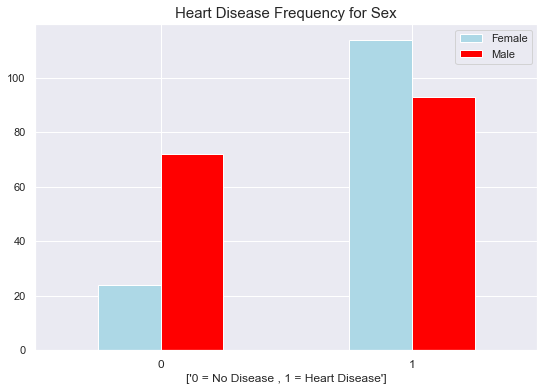

In [7]:
pd.crosstab(df_heart_disease.sex , df_heart_disease.target).plot(kind = 'bar',
                                                                 figsize = (9,6),
                                                                color = ['lightblue' , 'red'])

plt.title('Heart Disease Frequency for Sex' , fontsize = 15)
plt.xlabel(['0 = No Disease , 1 = Heart Disease'])
plt.legend(['Female' , 'Male'])
plt.xticks(rotation = 0 , fontsize = 12);

### Age vs Max Heart Rate for Heart Disease

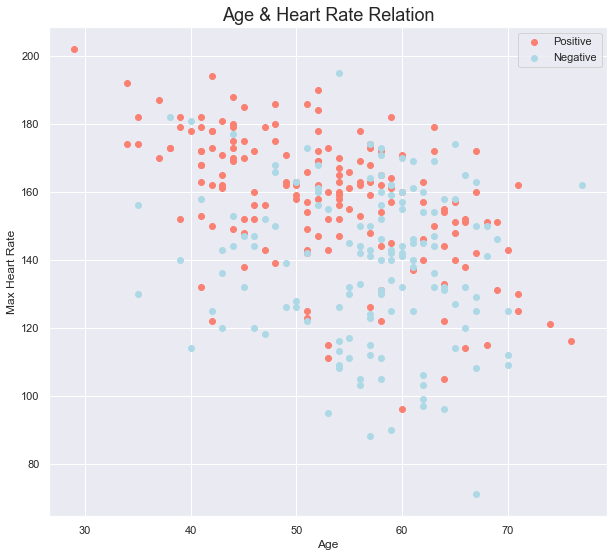

In [8]:
## Plotting Scatter graph for Age vs Heart Rate for Positive

plt.figure(figsize = (10,9))
plt.scatter(df_heart_disease['age'][cond1],
            df_heart_disease['thalach'][cond1],
            c = 'salmon',
            label = 'Positive')

## Plotting Scatter graph for Age vs Heart Rate for Negative
plt.scatter(df_heart_disease['age'][cond0],
            df_heart_disease['thalach'][cond0],
            c = 'lightblue',
            label = 'Negative')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age & Heart Rate Relation' , fontsize = 18)
plt.legend()
plt.show()

<AxesSubplot:>

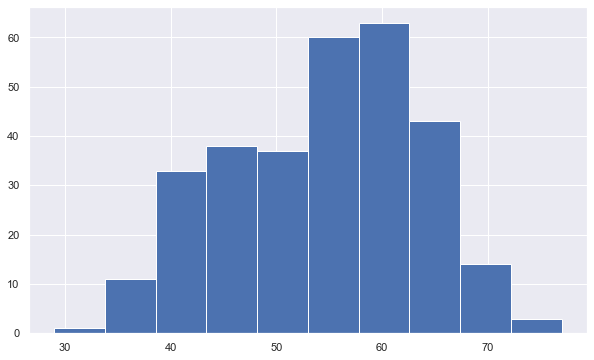

In [9]:
plt.figure(figsize = (10,6))

df_heart_disease.age.hist(bins = 10)

### Heart Disease Frequency per Chest Pain Type

For Chest Pain (CP) function :
    
- 0 : Typical Angina : chest Pain related decrease bllod supply to heart
- 1 : Typucal Angina : chest paiun not related to heart
- 2 : Non Anginal Pain : Typically esophageal spasms (non heart related)
- 3 : Asymptomatic : chest p;ain not showing signs of disease


In [10]:
pd.crosstab(df_heart_disease.cp , df_heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


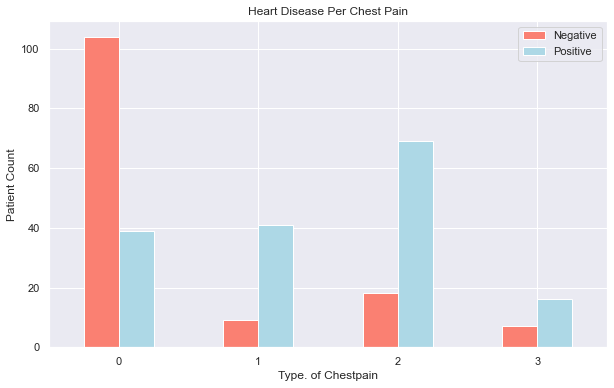

In [11]:
pd.crosstab(df_heart_disease.cp , df_heart_disease.target).plot(kind = 'bar' ,
                                                               figsize = (10,6),
                                                               color = ['salmon' , 'lightblue'])
plt.xlabel('Type. of Chestpain')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0)
plt.title('Heart Disease Per Chest Pain')
plt.legend(['Negative' , 'Positive']);

### Heart Disease Frequency per Exercised Induced Angina (exang)

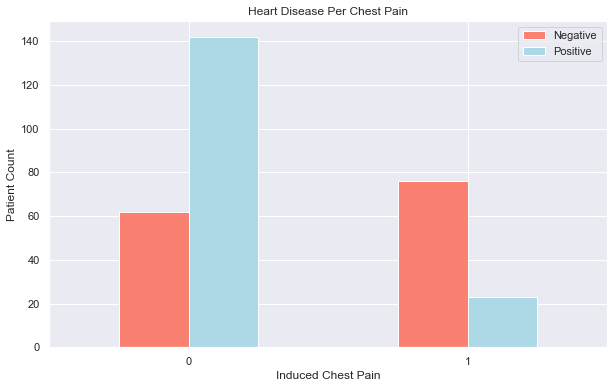

In [12]:
pd.crosstab(df_heart_disease.exang , df_heart_disease.target).plot(kind = 'bar' ,
                                                               figsize = (10,6),
                                                               color = ['salmon' , 'lightblue'])
plt.xlabel('Induced Chest Pain')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0)
plt.title('Heart Disease Per Chest Pain')
plt.legend(['Negative' , 'Positive']);

### Correlation Matrix

<AxesSubplot:>

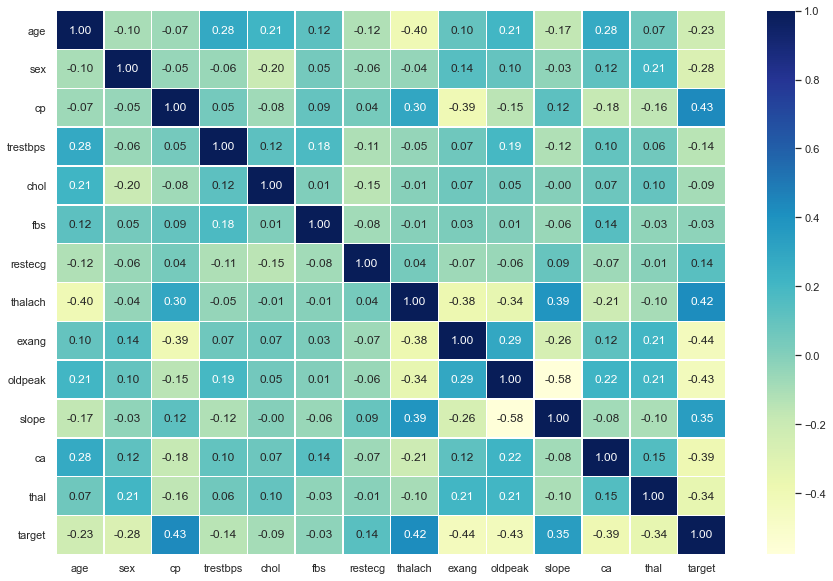

In [13]:
df_heart_disease.corr()

plt.figure(figsize = (15,10))
sns.heatmap(df_heart_disease.corr(),
           annot = True,
           cmap = 'YlGnBu',
           linewidth = 0.5,
           fmt = '.2f')

## 2.0 Data Modelling
___

**Problem Statement** : Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**Modelling Choices** : Prepare datasets , fir into various models and compare their results.

**Eveluation Matrix** : If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In [14]:
X = df_heart_disease.drop('target' , axis = 1)
y = df_heart_disease.target

clf = RandomForestClassifier()

np.random.seed(42)

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2)

clf.fit(X_train , y_train)
clf.score(X_test , y_test)

0.8524590163934426

### Model choices

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [15]:
clf_k = KNeighborsClassifier()

np.random.seed(42)

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2)

clf_k.fit(X_train , y_train)
clf_k.score(X_test , y_test)

0.6885245901639344

In [48]:
clf_lg = LogisticRegression()

np.random.seed(42)

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2)

clf_lg.fit(X_train , y_train)
clf_lg.score(X_test , y_test)

0.8852459016393442

In [17]:
clfs = {'Logistic Regression' : LogisticRegression(),
       'KNN' : KNeighborsClassifier(),
       'Random Forest Classifier' : RandomForestClassifier()}

In [18]:
def fit_and_score(clfs , X_train , X_test , y_train , y_test):
    
    np.random.seed(42)
    
    clf_score = {}

    # Loop through models
    for label , clf_estimator in clfs.items():
        clf_estimator.fit(X_train , y_train)
        clf_score[label] = clf_estimator.score(X_test , y_test)
    return clf_score

In [49]:
clf_score = fit_and_score(clfs,
                  X_train = X_train,
                  X_test = X_test,
                  y_train = y_train,
                  y_test = y_test)
clf_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model comparison prior to Hyperparameter Tuning

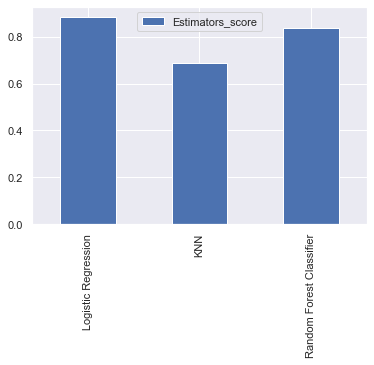

In [20]:
df_clf_score = pd.DataFrame(list(clf_score.items()) ,
                            columns = ['Estimators' , 'Estimators_score'],
                            index = ['Logistic Regression' , 'KNN' , 'Random Forest Classifier'])
df_clf_score.plot(kind = 'bar');

## 3.0 Estimators Valuation Score and Respective Metrics
___

- Hyperparameter tuning
- Feature importance
- Confusion Matrix
- Cross Val Score
- Precision - Check score for False Positive
- Recall - Check score for False Negative
- F1 Score - Combination of Precision and recall
- Classification Report
- ROC (Receiver Operating Characteristic)
- AUC 

### 3.1 Hyperparameter Tuning KNN by Hand
___

In [21]:
# Create an Empty List to Append
test_score = []
train_score =[]

neighbors = np.arange(1 , 21 , 1)
KNN = KNeighborsClassifier()

for i in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train , y_train)
    KNN_test_score = KNN.score(X_test , y_test)
    KNN_train_score = KNN.score(X_train , y_train)
    
    test_score.append(KNN_test_score)
    train_score.append(KNN_train_score)

In [22]:
df_KNN = pd.DataFrame(data = [train_score , test_score],
                     index = ['Train_Score' , 'Test_Score'] ).T
df_KNN

,Train_Score,Test_Score
0,1.000000,0.622951
1,0.809917,0.639344
2,0.772727,0.655738
3,0.743802,0.672131
4,0.760331,0.688525
5,0.752066,0.721311
6,0.743802,0.704918
7,0.723140,0.688525
8,0.719008,0.688525
9,0.694215,0.704918


 Maximum KNN score is 75.41% at neighbour count : 10


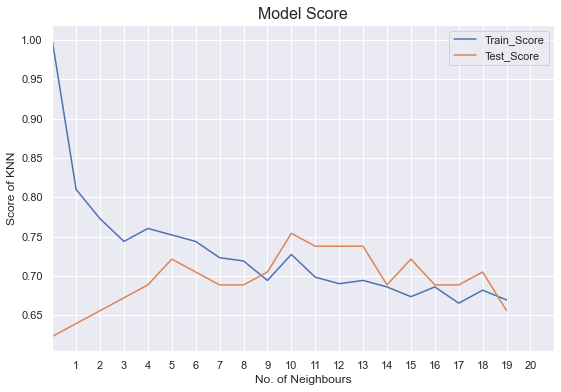

In [23]:
df_KNN.plot(figsize = (9,6))
plt.xlabel('No. of Neighbours')
plt.ylabel('Score of KNN')
plt.xticks(np.arange(1 , 21))
plt.title('Model Score' , fontsize = 16)
plt.xlim(0 , 21)

print(f' Maximum KNN score is {np.max(df_KNN.Test_Score)*100:.2f}% at neighbour count : {df_KNN.Test_Score.idxmax()}')

### 3.2 Hyperparameter Tuning by RandomizedSearchCV

In [24]:
LR_param_grid = [{'C' : np.logspace(-4 , 4 , 30),
                'solver' : ['liblinear' , 'sag' , 'saga']}]

RFC_param_grid = [{'n_estimators' : np.arange(10 , 1000 , 50),
                 'min_samples_split' : np.arange(2 , 20 , 2),
                 'min_samples_leaf' : np.arange(1 , 20 , 2),
                 'max_depth' : [None , 3 ,5 , 10]}]

In [50]:
np.random.seed(42)


rs_LR = RandomizedSearchCV(LogisticRegression(),
                           param_distributions = LR_param_grid,
                           verbose = False,
                           cv = 5)

rs_LR.fit(X_train , y_train)
rs_LR.score(X_test , y_test)

0.8852459016393442

In [26]:
rs_LR.best_params_

{'solver': 'liblinear', 'C': 0.38566204211634725}

In [27]:
np.random.seed(42)

rs_RFC = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = RFC_param_grid,
                           verbose = False,
                           cv = 5,
                           n_iter = 20)

rs_RFC.fit(X_train , y_train)
rs_RFC.score(X_test , y_test)

0.8688524590163934

In [28]:
clf_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### 3.3 Hyperparameter Tuning by GridSearchCV
___

In [51]:
np.random.seed(42)

LR_param_grid = {'C' : np.logspace(-4, 4 , 30),
                 'solver' : ['liblinear' , 'sag' , 'saga']}

gs_LR = GridSearchCV(LogisticRegression(),
                     param_grid = LR_param_grid,
                     cv = 5,
                     verbose = False)

gs_LR.fit(X_train , y_train)
gs_LR.score(X_test , y_test)

0.8852459016393442

In [30]:
clf_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [31]:
gs_LR.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

# 4.0 Evaluating Estimators
___

* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [32]:
y_preds = gs_LR.predict(X_test)

#### ROC Curve

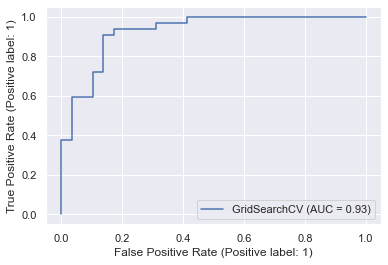

In [33]:
plot_roc_curve(gs_LR,
              X_test,
              y_test)

#### Confusion Matrix

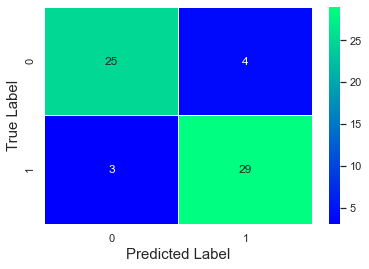

In [34]:
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat,
           cmap = 'winter',
           annot = True,
           linewidth = 0.5)

plt.xlabel('Predicted Label' , fontsize = 15)
plt.ylabel('True Label' , fontsize = 15);

#### Classification Report

In [35]:
X = classification_report(y_test , y_preds, output_dict=True)
pd.DataFrame(X).T

,precision,recall,f1-score,support
0,0.892857,0.862069,0.877193,29.000000
1,0.878788,0.906250,0.892308,32.000000
accuracy,0.885246,0.885246,0.885246,0.885246
macro avg,0.885823,0.884159,0.884750,61.000000
weighted avg,0.885477,0.885246,0.885122,61.000000


* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

#### Cross Validation Score

In [36]:
gs_LR.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
clf_Log_Reg = LogisticRegression(C = 0.204335971,
                        solver = 'liblinear')

In [38]:
X = df_heart_disease.drop('target' , axis = 1)
y = df_heart_disease['target']


cv_accuracy = cross_val_score(clf_Log_Reg,
                X,
                y,
                cv = 5,
                scoring = 'accuracy')

cv_precision = cross_val_score(clf_Log_Reg,
                X,
                y,
                cv = 5,
                scoring = 'precision')

cv_f1 = cross_val_score(clf_Log_Reg,
                X,
                y,
                cv = 5,
                scoring = 'f1')

print(f' Accuracy Average Score is {cv_accuracy.mean():.2f}')
print(f' Precision Average Score is {cv_precision.mean():.2f}')
print(f' F1 Average Score is {cv_f1.mean():.2f}')

 Accuracy Average Score is 0.84
 Precision Average Score is 0.82
 F1 Average Score is 0.87


In [39]:
cv_metrics = {'Accuracy' : cv_accuracy.mean(),
              'Precision' : cv_precision.mean(),
              'F1' : cv_f1.mean()}

pd.DataFrame(cv_metrics,
            index = ['Metric Score']).T

,Metric Score
Accuracy,0.844699
Precision,0.820794
F1,0.867301


# 5.0 Feature Importance
___

Feature Importance is like asking " which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model.

In [40]:
gs_LR.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
clf_Log_Reg = LogisticRegression(C = 0.20433597178569418,
                                solver = 'liblinear')

clf_Log_Reg.fit(X_train , y_train)

clf_Log_Reg.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [42]:
df_heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
X1 = df_heart_disease.drop('target' , axis = 1).columns
X2 = clf_Log_Reg.coef_
X3 = dict(zip(X1 , X2[0])) # [0] is to access the first layer matrix inside X2 , which is the whole list of coef
X3

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

In [44]:
df_feature = pd.DataFrame(X3 , index = ['Score'])
df_feature = df_feature.T
df_feature

,Score
age,0.003167
sex,-0.860447
cp,0.660670
trestbps,-0.011570
chol,-0.001664
fbs,0.043861
restecg,0.312758
thalach,0.024594
exang,-0.604131
oldpeak,-0.568628


<AxesSubplot:title={'center':'Feature Importance'}>

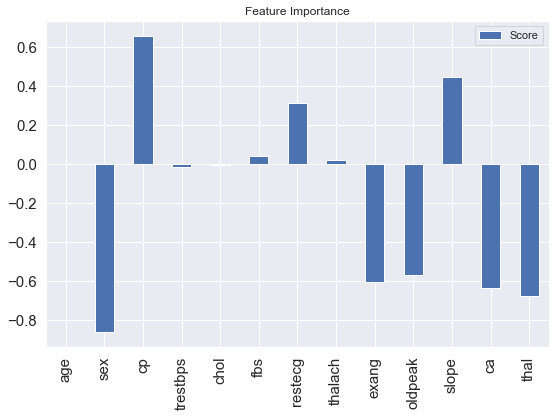

In [45]:
df_feature.plot(kind = 'bar' , 
                 figsize = (9,6),
                 title = 'Feature Importance' , fontsize = 15)

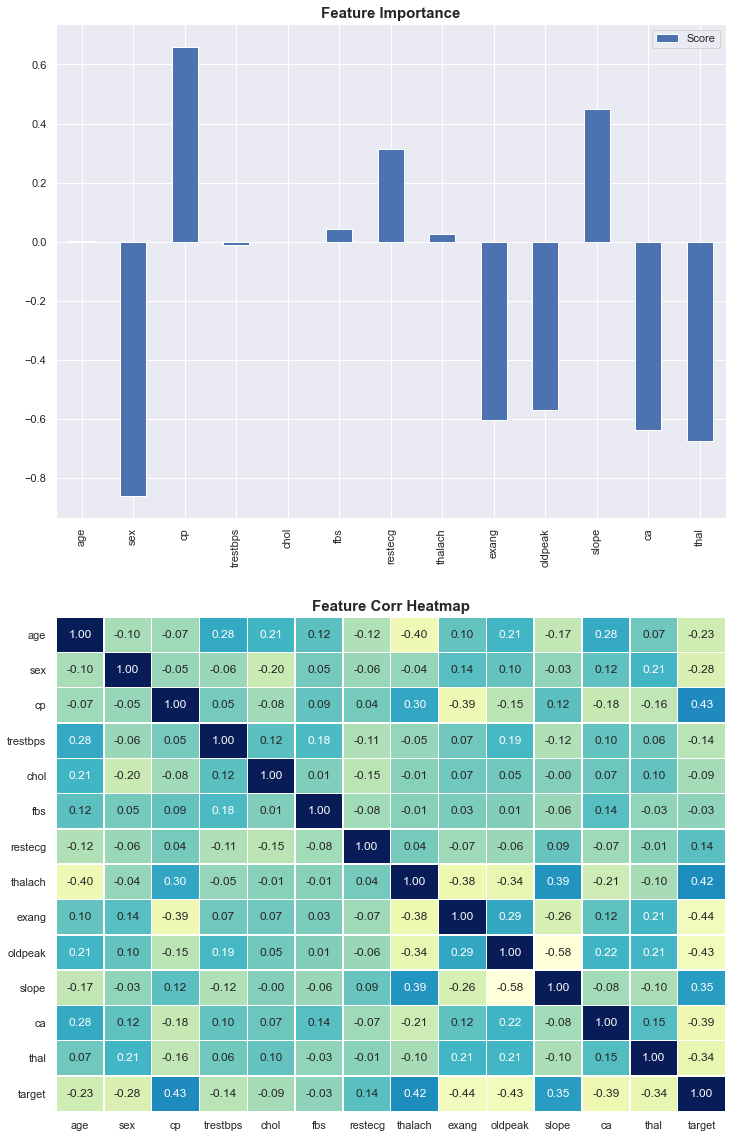

In [46]:
fig, axes = plt.subplots(2,1 , figsize = (12,20))

df_feature.plot(ax = axes[0],
                kind = 'bar')

sns.heatmap(ax = axes[1],
            data = df_heart_disease.corr(),
            annot = True,
            cmap = 'YlGnBu',
            linewidth = 0.5,
            fmt = '.2f',
            cbar = False)

axes[0].set_title('Feature Importance' , fontsize = 15 , fontweight = 'bold')
axes[1].set_title('Feature Corr Heatmap' , fontsize = 15 , fontweight = 'bold')

plt.show()

# 6.0 Conclusion : Did we hit our Evaluation Metric Target and whats next?
___

**Problem Statement** : Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**Modelling Choices** : Prepare datasets , fit into various models and compare their results.

**Evaluation Matrix** : If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

We did not meet the evaluation metric set at **95%**. Our various model so was slightly **90%**

**Whats next?**

- Continue to tune the hyperparameter for the best model so far
- Collect more data
- Another model, possibly

The main takeaway for the next step is given sufficient time , we can continue to try to improve our model or try out other Various model, if more data might not be avaliable at the moment